In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation
import datetime

In [3]:
data = pd.read_csv('dataset/ETH-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-02,13.9917,14.0484,13.6292,13.7380,13.7380,10477200.0
1,2016-06-03,13.7429,13.8738,13.2543,13.8467,13.8467,22981500.0
2,2016-06-04,13.8643,13.9454,13.4218,13.7404,13.7404,15792400.0
3,2016-06-05,13.7625,14.0722,13.5678,13.9750,13.9750,11088400.0
4,2016-06-06,14.0007,14.0585,13.7349,13.9341,13.9341,8720400.0


# Comopute Mid Price

In [4]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices+low_prices)/2

# Create Windows

In [5]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [6]:
normalized_data = []

for window in result:
    normalized_window = [((float(p) / float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)

In [7]:
#split train and test
row = int(round(result.shape[0]*0.9))
train = result[:row,:]
np.random.shuffle(train)

x_train = train[:,:-1]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test = result[row:,-1]

x_train.shape, x_test.shape

((1598, 50, 1), (178, 50, 1))

# Build a Model

In [8]:
model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [9]:
model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          batch_size=10,
          epochs=20)

Epoch 1/20
160/160 [==============================] - 33s 39ms/step - loss: nan - val_loss: nan
Epoch 2/20
160/160 [==============================] - 4s 27ms/step - loss: nan - val_loss: nan
Epoch 3/20
160/160 [==============================] - 5s 29ms/step - loss: nan - val_loss: nan
Epoch 4/20
160/160 [==============================] - 5s 30ms/step - loss: nan - val_loss: nan
Epoch 5/20
160/160 [==============================] - 5s 29ms/step - loss: nan - val_loss: nan
Epoch 6/20
160/160 [==============================] - 4s 27ms/step - loss: nan - val_loss: nan
Epoch 7/20
160/160 [==============================] - 4s 26ms/step - loss: nan - val_loss: nan
Epoch 8/20
160/160 [==============================] - 4s 26ms/step - loss: nan - val_loss: nan
Epoch 9/20
160/160 [==============================] - 5s 29ms/step - loss: nan - val_loss: nan
Epoch 10/20
160/160 [==============================] - 4s 28ms/step - loss: nan - val_loss: nan
Epoch 11/20
160/160 [===========================

# Prediction

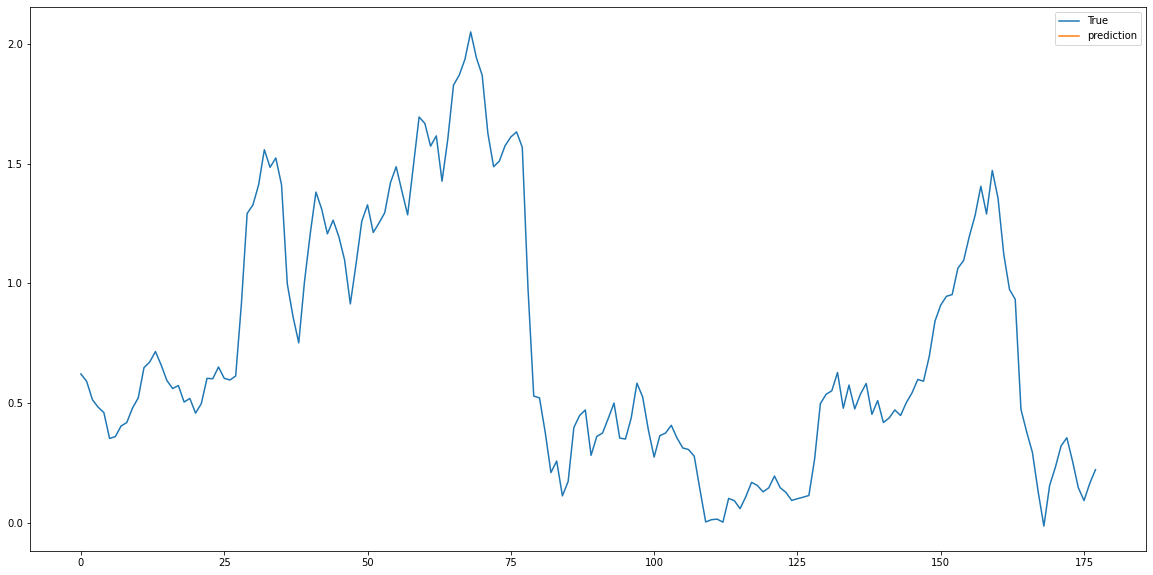

In [10]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white',figsize=(20,10))
ax=  fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='prediction')
ax.legend()
plt.show()